# **Membuat Model NLP dengan TensorFlow**

### **Siswa:** Hanzalah Assidiq

 **Dataset:** kaggle datasets download -d venky73/spam-mails-dataset

In [1]:
# proses import dataset 'spam_ham_dataset.csv'
# mengubah dataset menjadi dataframe
import pandas as pd
df = pd.read_csv('spam_ham_dataset.csv')
df.shape

(5171, 4)

In [2]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
# dari info diatas dapat diketahui bahwa dataset memiliki 5171 data
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
# dapat dilihat bahwa data kolom 'text' yang ada di dataset belum seragam dan rapih
# maka perlu dilakukan Text Data Pre-Processing
# Importing NLTK Libraries

import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# mengubah huruf kapital menjadi huruf kecil

def clean_lower(lwr):
    lwr = lwr.lower()
    return lwr
 
df['lwr'] = df['text'].apply(clean_lower)

In [7]:
# Menghapus tanda baca (karakter selain huruf seperti titik, koma, seru dll)

clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

df['clean_punct'] = df['lwr'].apply(clean_punct)

In [8]:
# Menghapus Double atau Lebih Whitespace

def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

df['clean_double_ws'] = df['clean_punct'].apply(_normalize_whitespace)

In [9]:
# menghapus kata-kata umum yang tidak memiliki makna
# misalnya are, is, wa, were, they, you dll dalam bahasa inggris
# clean stopwords

stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

df['clean_text'] = df['clean_double_ws'].apply(clean_stopwords)

In [10]:
# melihat dataframe
df.head()

,Unnamed: 0,label,text,label_num,lwr,clean_punct,clean_double_ws,clean_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291 thi...,subject enron methanol meter 988291 this is a ...,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom for january 9 2001 see att...,subject hpl nom for january 9 2001 see attache...,subject hpl nom january 9 2001 see attached fi...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho we re aroun...,subject neon retreat ho ho ho we re around to ...,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap ...,subject photoshop windows office cheap main tr...,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject: re : indian springs\r\nthis deal is t...,subject re indian springs this deal is to ...,subject re indian springs this deal is to book...,subject indian springs deal book teco pvr reve...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5171 non-null   int64 
 1   label            5171 non-null   object
 2   text             5171 non-null   object
 3   label_num        5171 non-null   int64 
 4   lwr              5171 non-null   object
 5   clean_punct      5171 non-null   object
 6   clean_double_ws  5171 non-null   object
 7   clean_text       5171 non-null   object
dtypes: int64(2), object(6)
memory usage: 323.3+ KB


In [12]:
# menghapus kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0', 'label', 'text', 'lwr', 'clean_punct', 'clean_double_ws'])
df

,label_num,clean_text
0,0,subject enron methanol meter 988291 follow not...
1,0,subject hpl nom january 9 2001 see attached fi...
2,0,subject neon retreat ho ho ho around wonderful...
3,1,subject photoshop windows office cheap main tr...
4,0,subject indian springs deal book teco pvr reve...
...,...,...
5166,0,subject put 10 ft transport volumes decreased ...
5167,0,subject 3 4 2000 following noms hpl take extra...
5168,0,subject calpine daily gas nomination julie men...
5169,0,subject industrial worksheets august 2000 acti...


In [13]:
# proses pembagian data training dan data test
from sklearn.model_selection import train_test_split
kalimat = df['clean_text'].values
y = df['label_num'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [14]:
# melakukan proses tokenizer, sequence dan padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)
tokenizer.fit_on_texts(kalimat_test)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

padded_latih.shape, padded_test.shape

((4136, 3475), (1035, 1494))

In [15]:
# membuat model dengan LSTM
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
# mendifinisikan fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nSelamat akurasi model telah mencapai > 85% !")
      self.model.stop_training = True
callbacks = myCallback()

In [18]:
hist = model.fit(padded_latih, y_latih,
                 batch_size=64,
                 epochs=30,
                 validation_data=(padded_test, y_test),
                 verbose=2,
                 callbacks=[callbacks])

Epoch 1/30
65/65 - 182s - loss: 0.3841 - accuracy: 0.8349 - val_loss: 0.1238 - val_accuracy: 0.9507 - 182s/epoch - 3s/step
Epoch 2/30

Selamat akurasi model telah mencapai > 85% !
65/65 - 176s - loss: 0.0596 - accuracy: 0.9780 - val_loss: 0.0585 - val_accuracy: 0.9787 - 176s/epoch - 3s/step


In [19]:
model.evaluate(padded_test, y_test)

33/33 [==============================] - 6s 177ms/step - loss: 0.0585 - accuracy: 0.9787


[0.05852328985929489, 0.9787439703941345]

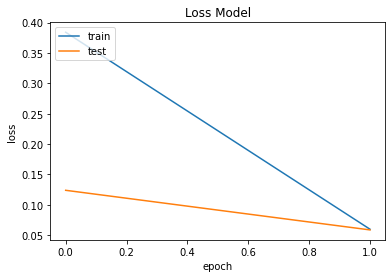

In [20]:
# membuat plot loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

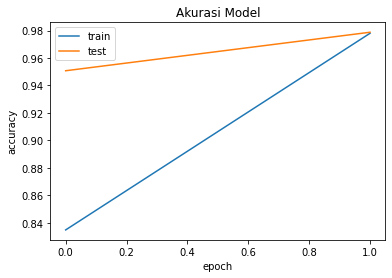

In [21]:
# membuat plot akurasi
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()